pd.read_csv 할때 한글은 인코딩 cp949사용
참고:https://wikidocs.net/22660

# 정수 인코딩
단어에 숫자를 부여하는 방법 중 하나로 단어를 빈도수 순으로 정렬하여 단어 집합(vocabulary)을 만들고, 빈도수가 높은 순서대로 차례로 낮은 숫자부터 정수를 부여하는 방법이 있습니다. 이해를 돕기위해 단어의 빈도수가 적당하게 분포되도록 의도적으로 만든 작은 텍스트 데이터를 가지고 빈도수 순서대로 단어를 정수로 바꿈


In [19]:
text="A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."




# 문장 토큰화 

In [20]:
from nltk.tokenize import sent_tokenize
text=sent_tokenize(text)
print(text)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


# 단어 토큰화 

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

vocab=Counter() # 파이썬의 Counter 모듈을 이용하면 단어의 모든 빈도를 쉽게 계산할 수 있음

sentences=[]
stop_words=set(stopwords.words('english'))

for i in text:
    sentence=word_tokenize(i)  # 단어 토큰화를 수행
    result=[]
    
    for word in sentence:
        word=word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄임
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거
                result.append(word)
                vocab[word]=vocab[word]+1 #각 단어의 빈도를 Count 함
    sentences.append(result) 
print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [22]:
#각 단어에 대한 빈도수
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [23]:
#빈도수 순으로 정렬
vocab_sorted=sorted(vocab.items(), key=lambda x:x[1], reverse=True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [24]:
#빈도수에 따라 인덱스 부여
word_to_index={}
i=0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # 정제(Cleaning) 챕터에서 언급했듯이 빈도수가 적은 단어는 제외한다.
        i=i+1
        word_to_index[word]=i
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


# 2. 케라스 텍스트 전처리 (개인 컴퓨터 오류)

In [25]:
from keras.preprocessing.text import Tokenizer
text=["A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."]
t = Tokenizer()
t.fit_on_texts(text)

Using TensorFlow backend.


ImportError: cannot import name 'plot_model'

fit_on_texts는 텍스트의 리스트(list)를 가지고 단어 빈도수에 기반한 사전을 만듭니다. 빈도수 순으로 단어에게 인덱스를 부여하는데, 정확하게 위에서 설명한 정수 인코딩 작업이 이루어진다고 보면됩니다. 각 단어에 인덱스가 어떻게 부여되었는지를 보려면, word_index를 사용합니다.

In [26]:
print(t.word_index)

NameError: name 't' is not defined

In [ ]:
#각 단어가 몇개 있는지 확인
print(t.word_counts)

 texts_to_sequences()는 입력으로 들어온 코퍼스에 대해서 각 단어를 word_index에서 이미 정해진 인덱스로 변환하여 변환하여 출력합니다.

In [ ]:
print(t.texts_to_sequences(text))

케라스 토크나이저의 도구를 사용하면서 사용자가 추가로 정제를 할 수는 있지만, 케라스 전처리 도구에 맞추어서 전처리를 해주는 작업이 직관적이지 않기 때문에 Counter() 등의 다른 방법을 사용할 때보다 오히려 더 복잡해질 수도 있습니다. 예를 들어 빈도수가 1인 단어에 대해서 word_index와 word_counts까지 고려하여 아예 제거하는 전처리 방법은 다음과 같이 수행할 수 있습니다.

In [ ]:
words_frequency = [w for w,c in t.word_counts.items() if c < 2] # 빈도수가 2미만 단어를 w라고 저장
for w in words_frequency:
    del t.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
    del t.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제
print(t.texts_to_sequences(text))
print(t.word_index)

 *국소표현 
국소 표현 방법은 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 표현
ex)예를 들어 puppy(강아지), cute(귀여운), lovely(사랑스러운)라는 단어가 있을 때 각 단어에 1번, 2번, 3번 등과 같은 숫자를 맵핑(Mapping)하여 부여
단점: 단어의 의미, 뉘앙스를 표현할 수 없

*연속표현
그 단어를 표현하고자 주변을 참고하여 단어를 표현
ex) puppy(강아지)라는 단어 근처에는 주로 cute(귀여운), lovely(사랑스러운)이라는 단어가 자주 등장하므로, puppy라는 단어는 cute, lovely한 느낌이다로 단어를 정의
장점: 단어의 뉘앙스를 표현할 수 있게 됩

# bow(bag of words) 

*단어들의 가방
텍스트에서 사용된 단어의 종류와 빈도만을 바탕으로 분석
전체 문장 구조르르 보지 않고 사용된 단어만 보고 대략의 의미 파악 가능

-장점
전처리 단순
단어들의 빈도를 간단히 수치화, 통계 방법 적용 가능
분석 결과 해석용이

-단점
문장 구조를 무시함에 따라 어순 상의 차이 파악 불가능
동음이의어 구별 어려움

In [27]:
from konlpy.tag import Okt
import re  
okt=Okt()  

# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  

token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.      
            
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)        



{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [28]:
bow

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

# 사이킷런 사용하여 bow 만들기

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


# 불용어 제거후 bow 만들기 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


# CounterVectorizer에서 제공하는 자체 불용어 사용

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


# NLTK에서 지원하는 불용어 사용

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
text=["Family is not an important thing. It's everything."]
from nltk.corpus import stopwords
sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# TDM 구축 

단어 문서 행렬(TDM)
문서별로 나타난 단어의 빈도를 표 형태로 나타낸 것
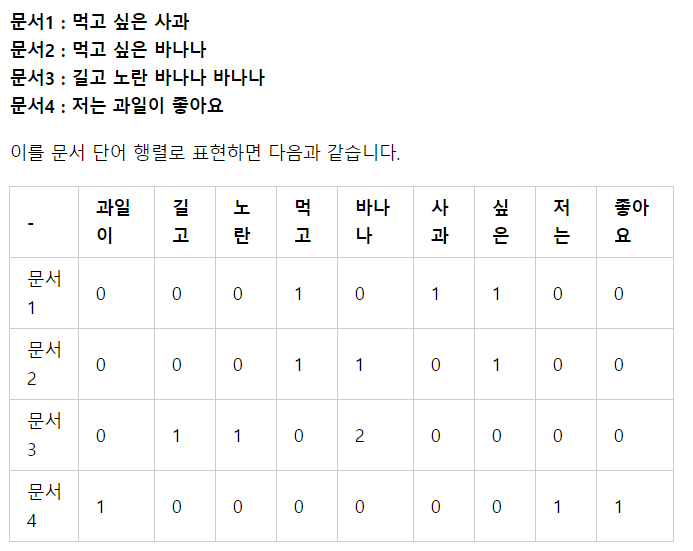

-희소 행렬
문서 내에서 사용되는 단어의 수가 많지만 하나의 문장이나 문서에서 사용되는 단어의 수가 제한적임에 따라 대부분의 칸이 0값

사례 수에 비해 변수의 수가 많아 분석이 어려움

-단순 빈도 수 기반 접근
중요한 단어와 불피요한 단어들이 혼재되어 있음


사이킷 런을 이용 

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


폭염 뉴스 메타데이터TDM 구축

In [34]:
import pandas as pd

df=pd.read_csv('폭염 (1990.01.01-2018.07.31)_5.csv', sep=',',quotechar='"',error_bad_lines=False,encoding='EUC-KR')



b'Skipping line 15: expected 18 fields, saw 19\nSkipping line 71: expected 18 fields, saw 19\nSkipping line 74: expected 18 fields, saw 19\nSkipping line 79: expected 18 fields, saw 19\nSkipping line 94: expected 18 fields, saw 19\nSkipping line 110: expected 18 fields, saw 19\nSkipping line 118: expected 18 fields, saw 19\nSkipping line 120: expected 18 fields, saw 19\nSkipping line 130: expected 18 fields, saw 19\nSkipping line 137: expected 18 fields, saw 19\nSkipping line 159: expected 18 fields, saw 19\nSkipping line 168: expected 18 fields, saw 19\nSkipping line 174: expected 18 fields, saw 19\nSkipping line 190: expected 18 fields, saw 20\nSkipping line 194: expected 18 fields, saw 19\nSkipping line 210: expected 18 fields, saw 21\nSkipping line 214: expected 18 fields, saw 20\nSkipping line 222: expected 18 fields, saw 19\nSkipping line 237: expected 18 fields, saw 19\nSkipping line 245: expected 18 fields, saw 20\nSkipping line 260: expected 18 fields, saw 19\nSkipping line 26

In [35]:
df.shape

(4924, 18)

In [36]:
df.columns

Index(['주소', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '개체명(인물)', '개체명(지역)',
       '개체명(기업/기관)', '키워드', '특성추출', '본문', '원본주소'],
      dtype='object')

In [37]:
df['본문'].head()

0    23일 경북 경산 39.9도까지 치솟아 1942년 8월1일 대구 40.0도 기..열...
1    롭스, 네일·염모제 매출 각각 52%·31% ↑ “아무리 더워도 아름다움 양보 못해...
2    중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....
3    중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....
4    OECD 주요국과 역행.. 탈원전이 상황 악화시켜       지난해 우리나라 이산화...
Name: 본문, dtype: object

okt분석기 활용

In [38]:
from konlpy.tag import Komoran

tagger=Komoran()
tagger.nouns('아침에 해를 보며 버스를 탔다')

['아침', '해', '버스']

In [39]:
import re
def get_nouns(text):
    nouns = tagger.nouns(text)
    nouns=[word for word in nouns if len(word)>1 ]
    nouns=[word for word in nouns if not re.match(r'\d+',word )]
    
    return nouns
get_nouns('아침에 해를 보며 버스를 탔다')

['아침', '버스']

폭염 관련 뉴스 메타데이터 TDM 구축 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=1000, tokenizer=get_nouns)
tdm=cv.fit_transform(df['본문'])
cv.get_feature_names()[:10]   # 첫 10 단어

['.co', '.com', '.kr', '가격', '가구', '가동', '가량', '가마솥', '가뭄', '가운데']

TDM 저장 

In [41]:
from sklearn.externals import joblib

with open('hot_news.pkl', 'wb') as f:
    joblib.dump({'vectorizer': cv, 'tdm':tdm},f)

C:\Users\Affinity\.conda\envs\keras\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


단어 빈도 표 만들기


In [42]:
with open('hot_news.pkl','rb') as f:
    data=joblib.load(f)
    
count=tdm.sum(axis=0)  #열 방향으로 사용

import pandas as pd

word_count= pd.DataFrame({'단어': cv.get_feature_names(),'빈도':count.flat})

C:\Users\Affinity\.conda\envs\keras\lib\site-packages\pandas\core\dtypes\dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [43]:
word_count.tail()

,단어,빈도
995,훈련,35
996,휴가,123
997,휴가철,137
998,휴식,125
999,휴일,36


In [44]:
sorted_df=word_count.sort_values('빈도',ascending=False)  #내림차순 정령

sorted_df.head(10)

,단어,빈도
921,폭염,10678
931,피해,1341
822,지역,1225
162,기자,1165
65,계속,1077
160,기온,980
567,연일,950
434,서울,932
819,지속,845
151,기록,831


# TF-IDF 

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


# 아마존 휴대폰에 대한 고객 리뷰 데이터 활용하여 TDM 만들기 

In [46]:
from urllib.request import urlretrieve
urlretrieve('http://doc.mindscale.kr/km/unstructured/review.gz', 'review.gz')

df=pd.read_csv('review.gz')



In [47]:
df.head()

,reviewText,overall
0,They look good and stick good! I just don't li...,4
1,These stickers work like the review says they ...,5
2,These are awesome and make my phone look so st...,5
3,Item arrived in great time and was in perfect ...,4
4,"awesome! stays on, and looks great. can be use...",5


 널값 확인

In [48]:
df.isnull().sum()

reviewText    99
overall        0
dtype: int64

null 값 데이터 포함된 행 삭제 

In [49]:
df=df.dropna()

In [50]:
corpus=df['reviewText'][:10000]

TDM 만들기 

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000, stop_words='english')
tdm = cv.fit_transform(df['reviewText'])

fit_transform은 fit과 transform 두 개의 메소드를 합친 것이다. fit은 단어 문서 행렬의 형태를 정하는 메소드로, 각 열에 들어갈 단어를 결정한다. 이 정보는 cv의 내부에 저장된다.

transform은 이렇게 정해진 형태로 데이터를 변환하는 메소드이다. 실제 단어 문서 행렬은 transform에 의해 만들어진다. 다른 데이터를 리뷰 데이터와 같은 형태로 변환하고 싶다면, fit_transform이 아닌 transform을 사용한다

In [52]:
words = cv.get_feature_names()

내용을 확인하려면 압축을 풀어주어야 한다. 이렇게 보면 대부분의 값이 0인 것을 볼 수 있다.

In [53]:
doc = tdm.toarray()
doc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

단어 빈도

In [54]:
count = tdm.sum(axis=0)

빈도순 정렬

In [55]:
import operator

word_order = sorted(
    word_count,
    key=operator.itemgetter(1), # 0이면 단어 순, 1이면 빈도 순
    reverse=True)               # 내림차순(역순)으로 정렬한다

# TF-IDF 계산 

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer().fit(corpus)           # 1만개만 적용
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'they': 18589, 'look': 11151, 'good': 8445, 'and': 1810, 'stick': 17579, 'just': 10436, 'don': 6131, 'like': 10971, 'the': 18496, 'rounded': 15789, 'shape': 16407, 'because': 2612, 'was': 20269, 'always': 1725, 'bumping': 3334, 'it': 10209, 'siri': 16722, 'kept': 10496, 'popping': 14009, 'up': 19640, 'irritating': 10171, 'won': 20676, 'buy': 3403, 'product': 14356, 'this': 18632, 'again': 1551, 'these': 18579, 'stickers': 17582, 'work': 20706, 'review': 15569, 'says': 16007, 'do': 6076, 'on': 12902, 'great': 8558, 'stay': 17537, 'phone': 13652, 'are': 2038, 'super': 17946, 'stylish': 17799, 'can': 3535, 'share': 16412, 'them': 18536, 'with': 20633, 'my': 12223, 'sister': 16726, 'awesome': 2361, 'make': 11373, 'so': 17013, 'have': 8909, 'only': 12923, 'used': 19730, 'one': 12910, 'far': 7385, 'had': 8753, 'for': 7860, 'almost': 1687

# 단어 임베딩

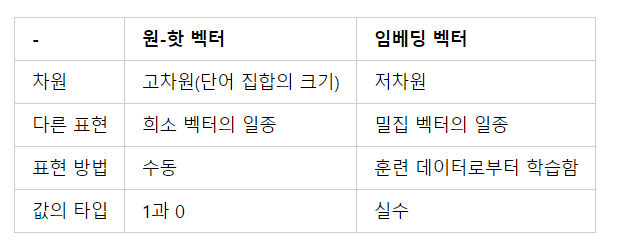

-Word2vec
비지도학습으로 임베딩 공간의 밀도를 높이는 방법
CBOW: 주변에 있는 단어들을 가지고 ,중간에 있는 단어들을 예측하는 방법, 문잭 단어의 순서는 예측에 영향 주지 않음
    
skip-gram:중간에 있는 단어로 주변 단어를 예측
    


# 임베딩 학습실습


 파이썬의 gensim 패키지에는 Word2Vec을 지원하고 있어, gensim 패키지를 이용하면 손쉽게 단어를 임베딩 벡터로 변환시킬 수 있음

pip install gensim

해당 파일을 열어보면 xml 문법으로 작성되어 있어 자연어를 얻기 위해서는 전처리가 필요함을 확인할 수 있습니다. 우리가 얻고자 하는 데이터는 영어문장으로만 구성된 내용을 담고 있는 <content>와 </content> 사이의 내용입니다. 데이터 전처리 작업을 통해 다른 xml 문법들은 제외시키고, 해당 내용만 가져와야 합니다. 뿐만 아니라, <content>와 </content> 사이의 내용 중에는 (Laughter)나 (Applause)와 같은 배경음을 나타내는 단어도 등장하는데 이 또한 제거해야 합니다.

전처리

In [57]:
import re
from lxml import etree
import nltk
from nltk.tokenize  import word_tokenize, sent_tokenize

targetXML=open('C:/Users/Affinity/Downloads/ted_en-20160408/ted_en-20160408.xml', 'r', encoding='UTF8')

In [58]:
target_text = etree.parse(targetXML)         #targetXML 해석
parse_text = '\n'.join(target_text.xpath('//content/text()'))
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져옵니다.

content_text = re.sub(r'\([^)]*\)', '', parse_text)
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거합니다.
# 해당 코드는 괄호로 구성된 내용을 제거하는 코드입니다.

sent_text=sent_tokenize(content_text)
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행합니다.

normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환합니다.

result=[]
result=[word_tokenize(sentence) for sentence in normalized_text]
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행합니다.

print(result[:10])
# 문장 10개만 출력

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'], ['facit', 'was', 'a', 'fantastic', 'company'], ['they', 'were', 'born', 'deep', 'in', 'the', 'swedish', 'forest', 'and', 'they', 'made', 'the', 'best', 'mechanical', 'calculators', 'in', 'the', 'world'], ['everybody', 'used', 'them'], ['and', 'what', 'did', 'facit', 'do', 'when', 'the', 'electronic', 'calculator', 'came', 'along'], ['they', 'continued', 'doing', 'exactly', 'the', 'same']]


워드2vec 실행

In [59]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW, 1은 Skip-gram.

유사한 단어 들 출력

In [60]:
a=model.wv.most_similar("man")
print(a)

[('woman', 0.8536277413368225), ('guy', 0.804918110370636), ('lady', 0.7955644130706787), ('girl', 0.7703580260276794), ('boy', 0.7679429054260254), ('gentleman', 0.7437495589256287), ('soldier', 0.7329484820365906), ('kid', 0.7151134610176086), ('poet', 0.689288854598999), ('rabbi', 0.6465142965316772)]


# 한글 word2vec 만들기

In [61]:
import nltk
from konlpy.corpus import kobill    #법률안 읽어오기

doc_ko=kobill.open('1809894.txt')


In [62]:
from konlpy.tag import Okt
okt=Okt()

학습데이터 만들기

In [63]:
n=0
result=[]

while True:
    line=doc_ko.readline()  #한 줄씩 읽음
    if not line: break    #모두 읽으면 while 문 종료
        
    n=n+1
    if n%5000 == 0:           #5000의 배수로 while 문이 실행될때마다 볓 번째 while 문 실행인지 출력
        print("%d번째 while문." %n)
        
    tokenlist=okt.pos(line, stem=True, norm=True)    #단어 토큰화
    temp=[]
    
    for word in tokenlist:
        if word[1] in ["Noun"]:  #명사일때만
            temp.append((word[0]))    # 해당 단어 저장
            
    if temp:            #만약 이번에 읽은 데이터에 명사가 존재 할경우
        result.append(temp) #결과 저장
        
doc_ko.close()

학습 데이터 확인


In [64]:
len(result)

49

학습 

In [65]:
from gensim.models import Word2Vec
model= Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=0)

유사한 단어 구하기 

In [66]:
a=model.wv.most_similar("학위")
print(a)

[('안', 0.03749462962150574), ('정', 0.034238047897815704), ('연한', -0.014739159494638443), ('관', -0.0663825124502182), ('수업', -0.07230395078659058), ('간호', -0.10273616015911102), ('및', -0.1387692391872406), ('제', -0.1902901828289032)]


In [67]:
b=model.wv.most_similar("수업")
print(b)

[('관', 0.07228948175907135), ('정', 0.06828606128692627), ('및', 0.055059097707271576), ('연한', -0.007546503096818924), ('안', -0.04437641054391861), ('학위', -0.07230395078659058), ('제', -0.08870488405227661), ('간호', -0.22132113575935364)]


# 사전 훈련된 임베딩 모델 사용 

구글이 제공하는 미리 학습된 word2vec 모델 사용
모델 다운로드 경로 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [69]:
from gensim.models import KeyedVectors 

#파일 다운 받아야 함
model=KeyedVectors.load_word2vec_format('C:/Users/Affinity/Downloads/GoogleNews-vectors-negative300.bin.gz', binary=True)

model.vectors.shape

print(model.similarity('this','is'))  #유사도 계산 

0.40797036387785435


# 미리 학습된 한국어 word2vec 사용

모델 다운로드 경로 : https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view

In [ ]:
import gensim
model = gensim.models.Word2Vec.load('C:/Users/Affinity/Downloads/ko/ko.bin')

In [ ]:
a=model.wv.most_similar("강아지")
print(a)

# 네이버 영화리뷰 word2vec 만들기

영화리뷰파일 불러오기

In [71]:
import csv

#네이버 영화 코퍼스를 읽는다.
f=open("ratings.txt", "r", encoding='utf-8')
rdr = csv.reader(f, delimiter = '\t')
rdw = list(rdr)

print(rdw[:3])

f.close()

[['id', 'document', 'label'], ['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '1']]


형태소 분석하기 

In [72]:
from konlpy.tag import Okt
okt=Okt()

#텍스트를 한줄씩 처리

result = []
for line in rdw:
    #형태소 분석하기, 단어 기본형 사용
    malist = okt.pos(line[1], norm = True, stem = True)
    r = []
    for word in malist:
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            r.append(word[0])
     #형태소 사이에 공백 " "  을 넣습니다. 그리고 양쪽 공백을 지웁니다.
    rl = (" ".join(r)).strip()
    result.append(rl)

In [77]:
#형태소들을 별도의 파일로 저장 합니다.
with open("NaverMovie.nip",'w',encoding = 'utf-8') as fp:
    fp.write("\n".join(result))

In [78]:
from gensim.models import word2vec
     #Word2Vec 모델 만들기
wData = word2vec.LineSentence("NaverMovie.nlp")
wModel =word2vec.Word2Vec(wData, size=200, window=10, hs=1, min_count=2, sg=1)
wModel.save("NaverMovie.model")
print("Word2Vec Modeling finished")

Word2Vec Modeling finished


In [80]:
from gensim.models import word2vec

model = word2vec.Word2Vec.load("NaverMovie.model")

print(model.most_similar(positive=["재미"]))

print(model.most_similar(positive=["최고"]))

[('재미없다', 0.6453866362571716), ('ㅋㄲ', 0.6130024194717407), ('내용', 0.6102781891822815), ('없슴', 0.6015800833702087), ('무것', 0.5978102684020996), ('감동', 0.5885788798332214), ('없다', 0.5823256969451904), ('긴장도', 0.5822669267654419), ('로다쥬', 0.5778021812438965), ('지루하다', 0.576752781867981)]
[('꼽겠다', 0.7272539138793945), ('단연', 0.6807171702384949), ('단언컨대', 0.6677454710006714), ('꼽습니', 0.6638627052307129), ('으뜸', 0.6550267934799194), ('손꼽다', 0.6471766829490662), ('꼽는', 0.6367325782775879), ('러브라이브', 0.6313095092773438), ('최고다', 0.6288340091705322), ('가금', 0.627142071723938)]


C:\Users\Affinity\.conda\envs\keras\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
C:\Users\Affinity\.conda\envs\keras\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [81]:
print(model.most_similar(positive=["집"]))

[('헤드폰', 0.605057418346405), ('홀로', 0.5833014249801636), ('마침', 0.5787340402603149), ('화실', 0.5645705461502075), ('이집', 0.5645657181739807), ('오호호', 0.5626593828201294), ('독서실', 0.5617995262145996), ('뛰어놀다', 0.5567723512649536), ('숙소', 0.5553733110427856), ('핰', 0.5550916194915771)]


C:\Users\Affinity\.conda\envs\keras\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


# 토지 word2vec

In [91]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from gensim.models import word2vec

#utf-16 인코딩으로 파일열고 글자 출력
fp=codecs.open("BEXX0003.txt", "r",encoding="utf-16")
soup=BeautifulSoup(fp, 'html.parser')
body=soup.select_one("body > text")
text=body.getText()

#텍스트 한줄씩 처리하기
twitter=Twitter()
results=[]
lines=text.split("\n")

for line in lines:
    #단어기본형 활용. 형태소 분석
    malist=twitter.pos(line, norm=True, stem=True)
    r=[]
    for (word, pumsa) in malist:
        #어미/조사/구두점 등은 대상에서 제외
        if not pumsa in ["Josa","Eomi","Punctuation"]:
            r.append(word)

    rl=(" ".join(r)).strip() #양쪽 공백 추가하여 조인
    results.append(rl)
    print(rl)

#파일로 출력
with open('toji.wakati','w',encoding='utf-8') as fp:
    fp.write("\n".join(results))
    
#Word2Vec 
data=word2vec.LineSentence('toji.wakati')
model=word2vec.Word2Vec(data,size=200,window=10,hs=1,min_count=2,sg=1) #size=listsize
model.save("toji.model")
print("ok")


C:\Users\Affinity\.conda\envs\keras\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')



제 1 편 어둠 발 소리
서다 序
1897년 의 한가위
까치 들 울타리 안 감나무 오다 아침 인사 하다 전 무색 옷 댕기 꼬리 늘 아이 들 송편 입 물 마을 길 쏘다 기쁘다 날뛰다 어른 들 해 중천 좀 기울어지다 무렵 이 래야 차례 치르다 하다 성묘 하다 하다 이웃 끼리 음식 나누다 보다 한나절 넘다 이 때 타 작 마당 사람 들 모 이기 시작 들뜨다 시작 남정 노인 들 아낙 들 채비 아무래도 더디다 그렇다 수 없다 것 식구 들 시중 음식 간수 끝내다 제 자신 치장 남아 있다 이 바람 고개 무겁다 벼 이삭 황금 빛 물결 이루다 들판 마음 놓다 새 떼 들 모여들다 풍 성하다 향연 벌이다
후우 이이 이 놈 새 떼 들 극성 새 쫓다 할망구 와삭 와삭 풀발 선 출입 옷 갈아입다 타 작 마당 굿 보고 있다 것 추석 마을 남녀 노유 사람 들 뿐 아니다 강아지 돼지 소나 말 새 들 시궁창 드나들다 쥐 새끼 포식 날인 보다
빠르다 장단 꽹과리 소리 느리다 장단 둔중하다 여음 울리다 징 소리 타 작 마당 거리 멀다 최 참판 댁 사랑 흐느낌 슬프다 들려오다 농부 들 지금 꽃 달리다 고깔 흔들다 신명 내다 괴롭다 하다 일상 日常 잊다 굿 놀이 열중 있다 것 최 참판 댁 섭섭찮 전곡 錢穀 이 나가다 풍년 미치다 못 하다 실하다 평작 임 틀림 없다 것 모처럼 허리 끈 풀다 쌀밥 식구 들 배 두드리다 테 하루 근심 잊다 만 하다 것
이 날 수 수 개비 꺾다 아이 들 매 맞다 않다 여러 달 솟다 증 素症 풀다 느긋하다 늙은이 들 뒷간 출입 잦다 힘 좋다 젊은이 들 벌써 읍내 가다 없다 황소 하다 마리 끌 돌아오다 꿈 꾸미다 읍내 씨름판 몰리다 간 것
최 참판 댁 사랑 무인 지경 적막하다 햇빛 맑다 뜰 비치다 사람 들 모두 어디 가버리다 새롭다 바르다 방문 장지 낯설다
한동안 타 작 마당 굿 놀이 멎다 것 같다 별안간 경 풍 들리다 것 꽹과리 악 쓴다 빠르다 드높다 꽹과리 따르다 징 소리 빨르다 깨깽 깨애깽 덥다 응응 음 깨깽 깨애깽 덥다 응응 음 장구 북 사이사이 끼 들려오다 신나다 타

일단 방 들어오다 뒤 나가다 좋다 말 떨어지다 않다 이상 서희 일어서다 수 없다 숨소리 죽 그래서 가냘프다 가슴 더 뛰다 양 어깨 숨 쉬다 수 없다 움직 못 하다 것 어리다 것 얼마나 크다 고통
이따금 책장 넘기다 소리 나다
길 상
별안간 귀청 찢다 것 같다 고함 서희 용수철 앉은자리 튀다
길 상
예
대답 함께 급하다 뛰다 발 소리 들려오다 뜰 아래 낫다 마님 부르다
앳된 소년 목소리 이다
방이 왜 이리 차다
곧 불 지피다
내 지금 방이 왜 이리 차다 묻다 않다
푸른 정맥 이마 빼기 부풀다 오르다 서희 얼굴 질린다
예 지금 곧 곧 불 지피다
이 놈 방이 왜 이리 차다 물다 고얀 놈
잘 못 하다 낫다 마님
소년 겁 먹다 소리 내다 매양 당하다 때문 길들다 사냥개 뒤쪽 달려가다 장작 한아름 안고 뛰어오다
으흐 컥
신경질 심하다 기침 유발 하다 치수 수건 꺼내다 입 막다 기침 멎다 않다 눈 활짝 벌어지다 붉다 눈알 불거지다 나오다 기침 잠시 틈 용 납치 않다 그 달겨 다 입 막다 상체 흔들다 고독 모습 이다
나 나 나가다
질식 하다 싶다 기침 멎다 가래 끓다 분간 하다 어렵다 목소리 간신히 치수 말 하다
방문 열다 마루 나오다 때 서희 토 하다 것 헛구역질 하다 마루 기다리다 있다 봉 순이
애기 씨
감싸다 서희 안다 헛구역질 딸꾹질 변하다 눈 눈물 그렁그렁 돌다
애기 씨
치마 걷다 봉 순이 서희 눈물 닦다 주다
2 장 추적
눈코 뜰 사이 없이 바쁘다 하루 해 저물다 오늘이 고비 이다 행랑 묵고 있다 마름 들 해 떨어지다 전 나귀 타고 대부분 돌아가다 절간 주방 넓다 최 참판 댁 부엌 한산하다 간조 干潮 의 바닷가 집안 휑 뎅그렁 하다 어젯밤 해도 행랑 부엌 쪽 밤 늦다 붐비다 상전 성미 성미 려니 가족 적다 적적하다 집안 많다 하인 들 행동거지 조용하다 길들이다 있다 워낙 어수선하다 객 식구 들 떠나다 뒤 밤 늦다 일 끝나다 않다 겨우 고 방 문 들 닫히다 쇠통 채우다 열쇠 꾸러미 안방 들어가다 이 리하 하루 일이 끝나다 것 부엌 일 다소 더디다 몸살 난 찬모 먼저

너 봉순 이리 오니
아이 팔 덥석 잡고 구석 끌 간다
멋꼬
긴장 어미 얼굴 보다 봉 순이 겁 먹다 잡히다 팔 뿌리치다
나 김 서방 댁 안 가다 다시다 안 가다
지레 비다
애기 씨 어디 기다 별당 기 시제
표정 무관 말 봉 순이 어리둥절하다
아깝다 별 당 아씨 옆 기 싰 늘다
가다 뫼시 나오니
오다
안심 되다 묻다
사랑 가다 놀다 하다
나 으리 벼락 내리다 믄 우짤라꼬
안 기다 애기 씨 뫼시 가다
안 기 시어
사랑 골방 가다 사깜살 놀다
그 믄 가다
그런데 말 옴 마가 오니 하다 때 오 믄 안 되다 알겄제
오다 그 래야 하노
시키다 대로 하므다 되다
애기 씨 가다 울 믄 어떻 게 하 꼬
음 그래도 안 되다 별당 별당 말 으음 음 그 그렇다 별당 연못 구렁이 있다 그거 잡다 크다
말 꾸미다 다가
내 말 알 들다
봉 순 네 버럭 역정 내다
방 돌아오다 봉 순 네 팔짱 끼 앉다
일이 손 잡히다 제
팔짱 풀 인두 화롯불 쑤다
밖 삼월 김 서방 찾다 있다 화롯불 쑤시다 인두 도닥거려 놓다 봉 순 네 바깥 기척 귀 기울이다
그것 어리다 적의 일 이다 운봉 살다 때 보다 일 사십이 다 되다 지금 봉 순 네 똑똑하다 기억 있다 보리 필 무렵 이다 것 같다 마을 사람 들 뒷산 몰리다 봉 순 네 따라가다 구 경 거리 염 진사 댁 종 시체 이다 거적 씌우다 보이지 않다 거적 피 젖다 있다 땅바닥 선지 피 흥건 히 괴어 있다 어른 들 사이 비 집다 얼굴 디민 봉순 눈 거적 귀퉁이 불거지다 송장 발 보이다 짚 세기 신다 크다 발 이다 피 묻다 거적 쉬파리 닝닝거리 있다 무슨 죄 지다 맞다 죽다 하다 푸르다 뎅뎅 크다 그 발 생각 하다 지금 입맛 떨어지다
바깥 기척 귀 기울이다 봉 순 네 그 크다 발의 환상 지우다 고개 흔들다 대다
마님 부르싰습
윤씨 목소리 들리다 않다 이따금 예 예 하다 대답 하다 김 서방 목소리 들려오다 한참 후 허둥거리다 김 서방 발 소리 봉순 방 앞 지나가다 행랑 쪽 술렁거리다 오랫동안 술렁거리다 고 방 문 닫히다 쇠 잠그다 소리 나다 그렇다 난 뒤 담장 안 담

귀 녀 코웃음 치 그 틈 가버리다 없다 최 참판 댁 봉순 처지 의젓하다 것 종 신분 아니다 것 윤씨 부인 그 우대 한다는 점도 있다 예절 바르다 마음 쓰다 공평하다 인품 존경 받다 까닭 있다 성질 거치다 사 내종 들 봉 순 네 한수 놓다 대다 귀 녀 전 봉 순 네 대 단 찮 여기다 봉 순 네 뚜렷하다 이유 없이 귀 녀 달 가다 여기다 오다 그렇다 부딪치다 보다 거 결국 귀 녀 당하다 하다 그렇다 차다 오늘 낮 그 귀 녀 서희 당한 것 아이 들 연못 가다 놀다 있다 길 상이 나무 베다 내다 둥치다 걸터 앉다 밀짚 작다 광주리 만들다 봉 순 네 별당 건넌방 방문 열다 아이 들 노 양 살피다 바느질 하다 있다
웬 겨울 날씨 이렇겄소 봄 오다 것 같다 삼월 별당 뜨락 들어서다 말 하다 그 건넌방 툇마루 걸터 앉다 눈살 모으다
큰일 이
머
간난 하다 말 이 미음 안 잡수다 카 어떻다 하므다 초상 두 번 나겄소
영 차도 없다
야 불쌍하다 멀다 멀다 해도 자식 없다 늙은이 제일 딱 하다
어하 가다 어하 가다
이 무삼 인연 인
봉 순이 연못 속 퐁당퐁당 돌 넣다 흥얼거리다 있다
삼월 나 업다
서희 쫓아오다
그렇다 애기 씨
삼월 이 얼른 툇마루 일어나다 서희 등 내미다 삼월 이 서희 업다 뜨락 오다 가다 봉 순이 따르다 흥얼흥 얼다 뚝 끊다 봉 순이 어느덧다 심청가 중 걸유 육아 乞乳育兒 의 대목 부르다 있다


아가 아가 우지 마르다
너 모친 멀다 가다
낙양 동 촌 이화 정
숙랑자 보다 가다
황릉묘 이비
회포 말 하다 가다
너 너 모친 잃다
설움 기다 울다
우지 마르다 우지 마르다
너 팔자 얼매 좋다
칠일만 어미 잃다
강보 중 고생 하리
우지 마르다 우지 마르다
해당화 범나비
꽃 지다 설다 마르다
명년 삼월 돌아오다
그 꽃 다시 피다


봉순 사람 울 리지 마르다 우 찌 그리다 슬프다
삼월 눈 눈물 괸다 이 때 뒤 깔깔 대 웃음소리 나다 돌아보다 삼월 젖다 눈 날 서다 귀 녀 상체 흔들다 다가오다
아아 들 선잠 깨 믄 울다 카더 마는 이 아아 웃다 서 천 서역 가다 불로 장

허허 허파 바람 들 겄 무신 은덕
칠성 이 용이 켜다 바싹 얼굴 돌리다 눈 끄다
조상 적 그 댁 땅 부치다 묵고 살 믄 서 헐뜯다 쓰겄
야 아야 성인 군자 겉 소리 마르다 고 방 쌀 썩다 기이 뉘 덕 응 말 한 분 해보다

흥 머 않다 멀다 않다 종놈 상전 기 집 뺏다 판국 아 국모 머리 끄다 뎅 끌 가다 개 죽다 크다 정승 높다 벼슬 아치 들 서울 서다 몰다 죽음 당하다 안 카 가다 또 민란 나야
부질없다 소리
부질없다 소리 다 세상 나오다 사대 육 부가 남만 못 하다 우리 평생 등 빠지다 적삼 보리 죽 말갛다
그리다 원통 크다 삼신할매 보고 물어보다 라모 비렁땅 뿌리다 씨 비렁땅 자라다 매련
용이 강 쪽 시선 돌리다 칠성 이 한동안 말 없다 한숨 푹 내쉬다
그 많다 땅때기 터럭 하나 뽑다 셈 치다 우리네 평생 허리 끈 끌다 한 분 살 볼 기다
내 거 아니다 믄 개똥 볼 일이 재물 많다 속 편하다 것 아니다 덥다
깨목 같다 소리 마르다 재물 믄 육도 벼슬도 하다 니 그 잘나다 소리 마르다 이 치 분 날 멀쩡하다 사 내 놈 짚 세기 몇 키레 닭 우 새끼 몇 마리 짊어지 우죽우죽 장 가다 꼴 좀 생각 해보다 말
별안간 칠성 이 미치다 듯 소리 지르다 하늘 향 하다 삿대질 하다
내사 아 둑 바둑 해보다 누 머 최 참판 네 옛날 옛적 고래 적 만석꾼 더 조상 적 백성 들 피 빨 모 운 재물 아니다 흉년 보리 하다 말 논 뺏다 모 운 재물 아니다 옛적 선비 들 이 마을 지나다 때 부채 얼굴 가리다 최 참판 고래 등 같다 집 외면 가다 돈 있다 도둑 놈 양반 돈 있다 종놈 마부 부리다 죄 안 짓다 우 찌 돈 모 우노 하늘 땅 덩이 뚝 떨어지다 땅 금 덩이 솟아오르다 도리 사람 으 도리 도리 지키다 부자 되다 양반 되다 얼매 남 등 치다 간 꺼내다 묵다 그 수단 따르다 부자 되다 양반 되다 아 김 평산 일 안 보건 대 양반 꼴 좋다 개다 출신 이기다 해도 양반 양반 아니다 그 꼴 좀 보지 이 마을 쓸개 빠지다 놈 아니다 믄 그 사람 양반 대접 하다 놈 하 낫 없다 오다 

구천이 그냥 상 사람 아니다 카드 마는 무주 구천동 암자 글공부 하다 카 기도 하다
강청댁 수모 당하다 임 의 관심 여전하다 구천이 있다 비우다 버리다 국수 대접 웃목 밀다 붙이다 강청댁 끈덕 지게 다시 시비 걸어오다
글공부 무슨 놈 글공부 절 절 머슴 살다 카 데 죽다 자식 고추 만지다 더 지금 이 마당 글공부 하다 이 믄 머 안 하다 이 믄 머 하다
아낙 들 생각 하다 짓 과 하다 싶다 상대 하다 말 듯 임 눈짓 들 하다 야 무 네
무신 내력 있다 있다 사람 머 동학 당 하다 말 있다 이번 구천이 근본 대하 이러니 저러다 지레짐작 뜨다 소문 밑천 삼다 이야기 자꾸 불다 하다 서울 어느 대가 댁 서출 늘다 어느 고을 원님 수 청 들다 기생 몸 난 자식 늘다 인물 그만하다 사대 분명하다 그냥 상 사람 이겠다 자다 짓 하다 수 없다 있다 수 있다 일 아니다 가문 좋다 재물 좋다 기 하다 마는 여자 여간 주모 없다 선골 풍 같다 남자 명 떼다 덤비다 마음 동하 않다 새 파란 나이 말 서방 님 지척 두다 딸 하나 낳다 뒤 만리 성 쌓다 살다 그렇다 수도 있다 서방 님 하다 안 그렇다 가다 우리네 눈 그 양반 어디 볼 구석 있다 버마재비 옷 걸어가다 사람 걸어가다 것 같다 그 양반 눈 보다 독사 풀숲 헤치다 지나가다 생각 들다 등골 오싹하다 그렇다 사람 마음 눈 마찬가지 젊다 양귀비 같다 여자 팔자 한탄 얼마나 하다
여자 란 아이 낳을 시기 되다 믄 눈 보이다 기 없어지다 카더라 마는 야 무 말 과부 막딸 늘다 얼굴 넓이 비 하다 작다 그 눈 깜박 거 린다 이야기 별 당 아씨 대한 동정 기울어지다 임 오다 강청댁 반대 하다 나서다 이 때 서로 으르렁 거리 던 것 잊다 동성 同性 무자비하다 점 일치 다 임 늘다 별 당 아씨 꼬리 치다 때문 죄 없다 구천이 당하다 죽이다 년 역설 하다 강청댁 어떻다 일이 있다 하다 설령 하늘 무너지다 땅 솟다 한 이 있다 하다 번 맺다 부부 인연 풀 수 없다 것 여자 편이 백 번 나쁘다 것 그것 남편 믿다 못 하다 데 오다 방폐 防弊 의

구천이 몇 달 앞서 윤씨 부인 타다 가마 따르다 최 참판 댁 오다 적 사랑 뜰 절 앞서 분홍 빛 석 산화 石傘花 가다 흐 드럽다 피어 있다 길 상이 서방 님 눈 노스 님 눈 더 무섭다 생각 하다 낯선 집 길 상이 둘레둘레 하다 있다 때 간난할멈 오다 물다
니 절 오다 믄
예
대사 편안하다
예
묻다 간난 할멈 곁 바 우 할아범 눈 꿈벅꿈벅 하 길 상의 대답 함께 듣다 서다 있다
원체 기 골 좋다 어른
늙다 내외 서로 마주 보다 눈 얘기 하 듯 하다 말 자다 듣다 서방 님 꾸중 하다 맘 끼 여기 있다 믄 중 되다 것 안 낫겄
간난할멈 치맛 자락 걷다 코끝 닦다 눈 비비다 대다 지금 길 상이 머릿속 그때 그 광경 왠지 생생하다 남아 있다
최 참판 댁 오다 여러 날 지난 어느 날 서방 님 찾아오다 선비 하다 사람 고 놈 차다 꼭 통인 通引 가다 그렇다
하다 침 삼키다 일이 있다 밀꽃 반들반들 윤 나 진사립 眞絲笠 쓸다 허위 대가 헌 칠 선비 이다 길 상 통인 무엇 그 말 잊다 않다 있다 간난할멈 물어보다
사또 옆 잔 심부름 하다 멀다 말 아니다 니 하다 잘생기다 그렇다 가다 길 상 또 하나 잊다 수 없다 것 그해 겨울 거지 꼴 하다 이 집 찾아오다 구천이 모습 객 식구 같다 생각 들다 외롭다 길 상 처음 구천이 정답 느끼다 해나 절 쯤 먼산 바라보다 언제 우두커니 서다 있다 잘 하다 구천이 멀리 숨다 보다 길 상 왠지 가슴 밉다 아픔 느끼다 기도 하다 서방 님 출타 중 이다 어느 날 길 상이 땅바닥 퍼지다 앉다 숯 덩이 그림 그리고 있다 왼손 병 들다 오른손 버들 가지 들다 관음 상 관음 상 아래쪽 그리다 내려가다 무심 결 눈길 돌리다 때 큼지막하다 짚 세기 보이다 길 상의 눈 저 모르다 거슬러 올라가다 곳 구천이 어 두운 눈빛 있다
자비 상
야
길 상이 기쁘다 얼른 대답 하다
어디서 배우다
절 맨날 그맀소
절
연곡사 혜관 스님
구천이 눈빛 더 얘기 하다 것 바라다 것 같다
장차 저 금 어 되다 기르다 하 심 맨날 초 화 그리다 하다 심다
글공부 하다
말씨 달라지다 

울 옴 마하 친하다 아지 매다 어련하다 보다
용이 남다 않다 떡국 하다 그릇 다 먹다 상 물리다 놀다 마당 꽹과리 장구 소리 들려오다
아지 매 이자 가입 시
이번 점잔 빼다 봉 순이 조르다
아직 멀다 이자 막 장작 불 피우다 하다 기다 미리 가다 떨다
아지 매도 갈다 기지
너 거 들 데리다 주다
아지 매다 구겡 안 하다 기요
옛적 많이 보다
용이 눈 월 선의 눈 지 남철 끌리다 합치다 월선 울상 지다
우 찌 니 나 원망 없다
마음속 중얼거리다 용이 눈 내리다 깔다 남 들 식구 끼리 모이다 앉다 인절미 빚던 섣달 그믐 날 밤 어느 절간 혼자 가다 죽다 어미 명복 빌다 월선 뼈 스며들다 법당 냉기 더 사무치다 설움 울다 여자 어리다 때 겁 많다 눈물 많다 누가 큰소리 지르다 울다 망태 영감 오다 해도 울다 치수 도련님 그렇다 말 하다 때 더욱더 질겁 하다 울다
아이 들 장터 쪽 소리 정신 팔다 무시 몸 옴 지락 거 린다
그 믄 가다
몸 옴 지락 거리 아이 들 보고 웃다 월선 일어서다 행주치마 풀다 명주 수건 찾다 얼굴 싸다 아이 들 먼저 뛰어나가다 밤 기운 맵 사방 캄캄하다 연방 장터 향 하다 사람 들 주다 가다 있다
용이 형님 오싰습
저만큼 오다 마을 젊다 들이다 물다 그 들 어디서 한잔 들 하다 모양 길 헤갈 걸어오다 용이 아이 들 월선 곁 비키다 서다
대낮 무신 술
야 한잔 하다 심다 이렇다 날 아니다 믄 언제 술 먹겄소 제 에기 어음 그 들 주기 酒氣 이상 거치다 분위기 뿜으 야비하다 시선 월선 보내다 용이 옆 스치다 지나가다 젊다 들다 저희 끼리 무슨 말 하다 킬킬 웃다 주먹 서로 옆구리 쥐어박다 또다시 킬킬하 웃다 용이 눈살 찌푸리다 월 서다 고개 떨구다 걷다 있다 희다 명주 수건 조금 나부끼다
요새 젊다 놈 들 염치 없다 망하다 세월 탓 걷다 잡 수 없이 울적하다 마을 젊다 은애 들 용이 자기 자신 대하 노여움 느끼다
월선
야
나 아무 데 서나 구겡할 것 아아 들 자리 자네 잡다
자네 말 월선 놀라다 그러나 용이 난처하다 심중 헤아리다
야
하다 다만 

거지 중 상 거지
별 당 아씨 등 업다 얼굴 숨기 있다 또 보다 캐다 강청댁 모르겄 구천이 분명하다 강청댁 보다 부끄럽다 기색 없다 피해 가다 기색 없다 눈 한 분 깜짝 하다 않다 똑바로 앞 보고 지나가다
그렇다 일 기
간난 할멈 눈 눈물 핑 돌다
강청댁 말 별당 씰 업다 가다 구천이 뒷 꼴 보고 서다 있다 눈물 나다
거지 중 상 거지 거지 중 환
야
아무 것 아니다
그 소릴 들다 은 사람 살다 기 대가 댁 외 며느리 자식 낳다 살다 거지 신세 되다 줄 누가 알다 겄 십
어멈 내 어지럽다 누버야겄다
야 누 부다
두 만 네 안방 가다 베개 가다 간난 할멈 머리 괴 어 주다
거지 중 상 거지
친정 그 후 아무 말 심다 없다 캅디까
무신 말 있겄노 이 쪽 알리다 않다 일 기고 서울 천리 밖 소식 들다 캐다 베린 자식 치부 하다 일 기니
친정 댁 형편 어떻다
기 차다 선비 집안 가문 이사 좋다 카더라 마는 엄 가풍 딸 자식 생사 알라 카겄
머 돌아가다 아씨 남도 아니다 카 말 들다 것 겉 십 니
그거 아니다 돌아가다 아씨 친정 연줄 혼살 하다
오다 두 분 서울 혼살 하다 일 고요
돌아가다 노마 님 서울 조씨 가문 아니다 가배 애초 그 어른 첫 번째 손 주 며느리 친정 곳 구 하다
서방 님 후사 때문 혼인 서둘다 않겄십

거궁 살림 선영 생각 하다 지금 늦다 늦다
그렇다 혼인 하다 당장 보다 이르다 카 믄 벌써 보다 일 기다 자손 귀하다 집안 어떨 런 그 씨 기이 떨어지다 서다 안 되다 곳 자다 떨어지다 더 마는
혼잣말 중얼거리다
옴마 아 배 점심 갖다 오다
열세 살 나이 훨씬 숙성하다 보이다 선 통 들어오다 제 어미 부르다 말 하다 그리고 마루 밑 낯선 미투리 보다 그 작은방 문 열다 기웃이 들여다보다
하다 무 이 오 싰 십
덧니 내다 웃다 동 글 넓적하다 얼굴 어미 닮다
운 내 새끼
눕다 눈 치켜뜨다 간난할멈 웃다
다니다 만 하다 가배
너 거 들 보고 저버 안 오다
니 아 배 점심 다 자싰
두 만 네 물다
야
밥 다 식다 제
숭녕 말 잡 사다
가다 정기 치우다 보리

주모 쏘다 붙이다
차다 그렇다
평산 되돌아오다 술값 셈 해주다
그 단시 밀리다 외상 워 짤 것 이
아따 댕삐 뎀비 누가 오늘 밤 숨 넘어가다
알 수 없다 일이 제 밤새 안녕 허시 안 허다 개비 평산 크다 기침 하다 마을 길 들어서다 정자나무 밑 온 그 무릎 꺾다 엉거주춤 쭈그리다 앉다 들판 내려다보다 술 한잔 말다 읍내 나가다 파다 강 포수 때문 발 묶인 것
그 놈 자식 여자 하다 입 다물다 여자 여자 값 고하 구해 달래다 값 고하 어떡허 그 놈 낼 아침 읍내 끌다 하다 거
들판 여자 남자 하다 것 없이 일손 바쁘다 평산 아들 거복 형제 타 작 마당 얼쩡거리다 있다 뿐 부모 바쁘다 마을 아이 들 놀다 못 하다 텅 빈 집 다섯 살바기 어리다 벌레 먹다 좁쌀 내다 말리다 멍석 앉다 새 쫓다 하다
뭣 잘못 하다 타 작 마당 거복 이 한복 쥐어박다 한복 울다 모습 보이다
값 고하 간 값
해 가늠 해보다 평산 일어서다
저 망나니 오다 저리 싸다니다 여기다 들판 노름 파다
육덕 좋다 기도 하다 자다 들다 칼 한 점 쓰윽 비어 내다 믄 근량 오지 날다
개다 야들야들하다 기고
개다 인 개다 맛 제일 더
범 물어 갈다 소리 대강 하다 일이 해
젊다 들다 객 적 잡담 두 만 아비 이 팽이 나무라다 평산 사가다 품다 남정 들보 아낙 들 더 노골 적 이다 아낙 들 그 만나다 일부러 다른 논둑 길 잡다 피해 가다
아니다 저 기이 뭣꼬
둑 있다 영 팔이 큰소리 외치다 그 옆 지나가다 평산 돌아보다 모자 쓰다 양복 입다 사내 말 타고 마을 어귀 들어서다 것 길섶 소 먹이 있다 아이 들 도망 치다
온 세상 별 꼴 다 보겄 구마 왜놈 아니다 모르겄소 영 팔이 평산 향 하다 불안 말 하다 들판 일 하다 대부분 농부 아낙 들 일어서다 멀다 빛 말 타고 가다 양복 차림 사나이 불안 바라보다
최 참판 댁 가다 보다
영 팔이 언덕 올라가다 말 보고 중얼거리다 평산 코방귀 컹 하다 뀌면 서울 조씨 사람 구먼
하다
야
궁금증 나서다 영 팔이 되다 물다 더 이상 말 하다 않다 평산 지나치다
해 꼴딱 넘어

비다 비다 터주 대감 비다 내 아들 감사 되어다 금 환향 하다 시 안반 들이다 떡 치다
또 추다 늘다 손 모으다 누각 현판 향 하다 절 하다 또 하다 이동진 또 추다 옆 스치다 지나다 나귀 옆 간다
다음 또 뵙다
한마디 인사 준구 남다 그 나귀 등 오르다 칠 빛 같다 검다 갓 눈 부시 희다 도포 자락 놀 받다 아름답다 하인 말 고삐 잡다 언덕 향 하다 내려가다 이동진 갓 끈 도포 끈 바람 불다 곳 나부끼다
치수 준 구가 발 옮기다 하다 때 또 추다 한 테 고약하다 냄새 풍기다 오다 다음 순간 갑자기 또 추다 늘다 팔매 달려오다
신 장대 왕 비다
크게 외치다 또 추다 늘다 하늘 땅 온 세 상의 초목 강물 아름 속 품다 넣다 두 팔 활짝 벌리다 원 그리다 치수 향 하다 예배 올리다 찢기다 옷 사이 내 어비 친 살 땟자국 밀리다 얼룩얼룩하다 할퀴다 찍히다 피 엉 겨 붙다 얼굴 근처 벌 하다 마리 붕 하다 맴 돈 다
치수 얼굴 주홍 빛 이다 눈알 핏물 괴어드 듯 보이다
신 장대 왕 비다 우리 자식 가갯 科擧 길 일월 비치다 옵 용상 이름 얹다 피맺힌 어미 소원 풀다 사이다
이 년 썩 물르다 못 하다
신 장대 왕
치수 기다 팔이 허공 짚다 것 같다 또 추다 늘다 땅바닥 구르다 그러나 발딱 일어서다 또 추다 늘다 손뼉 치다
훨훨 붙다 훨훨 붙다 지붕 땅 모 랭 이 무너지다 네 애 고부 백산 가다 활 만민 하다 백 립 쓰다 백의 입다 녹두장군 아 백 오 염주 손 들다 삼 칠 성주 외우다 네 애애
여자 벌룸벌룸 춤 추다
실성 보통 아니다
준구 이 맛살 찌푸리다 치수 얼굴 핏기 갈다 냉랭하다 미소 돌다 언덕 내려가다
정월 초여드렛 계명 소리 울리다 적 새다 새다 파랑 새다 녹두 낭 개 앉다 말다
가락 바람 타고 뒤 쫓아오다
미치다 기다 미치다 심상찮 미치다
준구 돌아보다
소위 개화당 이오
치수 눈 내리다 깔다 웃다
아들 놈 동학 당 이름 깨나 날리다 놈 포살 되어다
개화당
기왕 것 들어엎으려 뜻 개화당 하다 수 있다 않다 어쩌면 서울 개화당 만민 평등 들다 나오다 동학 더 개

이 사람 진나라 진시황 불로초 못 구 하다 크다 누가 개다 불로 장수 바라다 것꼬 내 명 하다 거 죽 시기 문 이원 미리 알 있다 그거 구마
점 쟁이 무당 알 기다 그 기이 머 대단하다
허다 돌 팔이사 어디 그렇다 가다 진맥 하다 난 뒤 문 이원 상구 보고 허다 말 약 지다 수 없다 벵자 청 하다 거나 주다 그 말 한마디 딱 고 더 그 말 구마

허다 상구 마음 어디 그렇다 가다 동기간 설마 새 파랗다 젊다 놈 죽다 싶었겄 문 이원 달라 들다 덥다 생 대 같다 젊다 놈 두다 그렇다 악정 나서다 그렇다 기다 어디 두다 보다 내 동생 정말 죽다 이르다 빼물 백방 약 쓰다 소용 있다 벵 골수 백 迫 이다 살림 축 가다 제
이 마작 죽다 사람 말 하므다 머하겄소 내사 만삭 되다 과부 울다 거 못 보겄더마 침 꿀컥 삼키다 성급하다 담배 빨다 사나이
그 그렇다 덥다 가다 없다 유복 자제 씨 남다 가다 청상 신세 애 연하다 문상 가다 돌아가다 두 남자 사이 말 끊어지다
어디 봉순 겉 사 램 또 하나 생깄는갑다
생각 하다 월 서다 더욱 깊이 치마 뒤지다 쓴다
참상 나다 배
여태 노 젓다 있다 늙다 사공 한마디 하다
스물 세 살 한창 나이 구마
사나이 대꾸 뱃전 곰방대 두드리다 나서다 허리춤 꽂다
문 이원 이사 명
사공 다시 한마디 하다
문 이원 말심 들다 이 믄 살림
하다 사공 다시
내 한창 시절 이다 시나 부로 아프다 꼭 죽다 돼다 좋다 카 약 안 묵다 보다 기이 없다 송장 물 묵다 신 굿 안 하다 다 소용없다 기르다 그렇다 연때 맞다 일 그렇다 문 이원 서다 약 열 첩 지 어묵 씻다 듯이 나다 그 말 구마 비싸다 약도 아니다 장복 하다 것 아니다 딱 열 첩 그것 뿐 이제 그렇다 멀다 해도 진맥 용하다 문 이원 이사 명 이제 명 그 뿐 것 데 없다 사람 사정 알 아무리 멀다 곳 벵자 있다 카 믄 오밤중 마다 안 허다 가시다 그렇다 어른 정말 없다 개뿔 아니다 돌 팔이 들 배때기 기름 올라서다 가다 마네 하다 하므다 거부 지기 겉 약 몇 첩 지다 파다 고치다 카이 문 이원 

막딸 늘다 허공 대고 삿대질 하다 고래고래 소리 지르다 물론 김 평산 들다 하다 말 달걀 훔치다 콩밭 콩 훑다 굽다 먹다 도둑 김 평산 큰아들 거복 이다 달걀 훔치다 콩 훑다 굽다 먹다 것 그 당장 들키다 혼 내주다 호박 경우 따다 손목 잡지 않다 게다가 개다 출신 노름 판 구전 뜯다 먹다 건달 망나니 하다 뒷구멍 사람 치부 하다 않다 명색 양반 면대 하다 퍼부을 수 없다 노릇 간접 악 쓸다 수 없다
허다 원님 도임길 왜 이리 떠들다
평산 코방귀 뀐다 막딸 가다 호박 도둑 거복 이 지목 하다 것 마찬가지 평산 역시 아들 소행 임 짐작 하다 모양 그러나 알 바 아니다 하다 시늉 거품 물다 떠들다 대다 막딸 를 빨다 쳐다보다 막딸 의 눈알 불거지다 평산 부채 들다 팔 천천히 내 저 으 며 불그레 얼굴 웃음 기 띠 팔자걸음 거만하다 태도 그 앞 지나가다 그러자 막딸 늘다 발딱 돌아서다 평산 뒤통수 대고 다시 떠들다 시작 하다
동네 궂히 놓다 새끼 대체 어느 놓다 집 구석 손고 오 하다 분도 아니다 두 분도 아니다 도둑질 이리 퍼뜻퍼뜻 하다 동네 가운데 두다 어디 살겄 하다 분도 아니다 두 분도 아니다 실삼 이렇다 그냥 못 두다 시상 놀다 묵다 놈 도둑질 안 하다 놈 보다 웃 물이 맑다 아랫 물이 맑다 내 호박 따다 간 놓다 손목 때기 당장 밤새 썩을 기 내 쥐 잡다 놨인 양 밥 해보다 그눔으 손목 때기 안 썩다 성하다 기 가다 뉘 입 없다 못 따다 묵다 뉘 저 거 아가리 처 넣다 꼬 호박 심다
하 거나 말다 평산 벌써 저만큼 부채 들다 손 저으 팔자걸음 거만 떨다 올라가다 있다 막딸 의 목소리 차츰 작아지다
더럽다 놓다 손 孫 바늘 도둑 소 도둑 되다 더 나무 되다 거 떡잎 아더 이렇다 남다 집 자식 들 궂히겄 양반 양반 꼴 좋다 썩다 놈 양반
치맛 말기 겨드랑이 밑 바짝 추 켜다 치마 끈 다시 여 밉다 구 지 렁 거리 데 평산 최 참판 댁 이르다 언 더 막다 오르다 있다
세 빠지다 놈 손 화 적 같다 놓다 새끼 조선 팔 묵고 대국 팔 묵 놈
오다 거 카노
호미 들

조준 구 최 참판 댁 온 지다 보름 부산 하다 번 다녀오다 부산 오다 때 그 깨끗하다 이발 하다 머리 하얗다 여름 모자 쓰다 있다 그리고 다시 보름 넘기다 보내다 서울 돌아가다 기미 보이지 않다 치수 과 히 기분 나쁘다 않다 때 바둑 두기 하다 활터 나가다 활 쏘다 하다 조심 시국 이야기 하다 주다 자신 치수 비위 맞추다 보다 일관 되다 못 자기 견해 깨닫다 못 바 아니다 한편 자신 시국 얘기 치수 조 소감 되다 못 하다 것 알 있다 그러나 치수 압력 눌 리다 보다 무엇 지껄이다 않다 견디다 수가 없다 답답하다 느끼다 치수 침묵 대항 하다 힘 없다 준구 내심 치수 몹시 겁 내다 있다 자기 속셈 다 드러내다 보이다 약점 치수 강인하다 성격 그 두 가지 합 하다 준 구르다 위축 케 하다 것 때문 치수 이마 빼기 푸른 줄이다 솟을 지경 이면 그 허둥지둥 치수 피하 마을 내려가다 하다 일단 치수 앞 떠나다 준구 의젓하다 너그럽다 서울 낫다 리가 되다 그 마을 농부 들 친해지다 많이 노력 하다 오가다 길 논둑 올라오다 쉬 있다 농부 들 마주치다 그 들 먼저 말 걸다 그 들 묻다 말 친절하다 대답 하다 농주 같다 것 권하다 경우 그 그 결벽증 희다 생시 켜다 사양 하다 않다 처음 양복 차림 그 요즘 봉 순 네 지다 잠자리 날개 같다 모 시옷 입다 경계 하다 마을 사람 들 사글사글하다 자상 말투 호감 가다 이르렀다 언제 양반 들 농민 이 친절하다 더욱이 준구 지체 높다 서울 양반 머리 박히다 사람 사실 농민 들 변화 싫어하다 농민 들 또한 권위 대한 숭배 지극 생리 지니 있다 개다 출신 김 평산 개다 출신 이기 존경 아니다 양반 잡 과 몰리다 투 전판 벌이다 때문 미워하다 경멸 하다 그 이유 양반 권위 잃다 때문 김훈 장 경우 그러하다 친애 정은 가지 농부 들 진배 없이 농사 짓다 종 하나 없다 처지다 이 역시 양반 권위 잃다 존재 이기 숭배 감 못 가지다 것 최 참판 댁 최 치수 하늘 생각 하다 것 그 농부 들 다정 지주 이기 때문 아니다 오만하다 조금 치의 접근 불허 

그 믄 삼 수아 배다 우 찌 돼다
그 놈 모르다 제 어디서 내 지르다 핏덩 겉 삼 수놈 행 랑방 넣다 달아나다 제 나이라 캐다 열 여덟 안 되다 놈 처녀 건디맀든 아니다 믄 아 미가 죽다 가다 크다 삼 수놈 지애 빌다 빼 써다 씨 틀림 없다 가배
이야기 빗나가다 것 깨달 간난할멈 얼른 말머리 돌리다
그래서 개 두 마리 때리다 잡고 그렇다 다음 개 안 기르다 누마 노마 님 그 길 중풍 들다 하다 해 눕다 계시 돌아가다
이 간난할멈 최 참판 댁 살림 이루다 내력 자세하다 않다 대충 들려주다 살림 일기 최 참판 모친 때 하다 그렇게 말 것 남편 사별 청상과부 로서 다만 그 힘 오늘 기틀 잡다 때문
그렇다 옛적 가문 좋다 기다 해도 기 차다 배 참판 어른 조모 님 살림 일기 소원 하다 육 경신 하 싰 덥다
그거 예사 사 램 예사 정성 못 하다 카 데
하모 예사 정성 가다 못 하제 일 년 여섯 분 하다 안 묵다 기사 말 하다 것 없다 하다 분 꼬박 자 불기 하므다 뒤 꼭대기 신관 지키다 있다 하늘 고해 바치니 다 허사 제 수 울 짓 믄 안 하다 사 램 없다 그렇다 그렇다 모르다 살림 일기 시작 하다 참판 어른 어무님 대단하다 분 가다 피 나다 살림 모으다 덥다 하다 대다 뛰다 참판 어른 며 누님 그렇다 중풍 돌아가다 노마 님 그 어른 또 남자 못지않다 배포 모으다 살림 늘이싰 또 하다 대다 뛰다 지금 아씨 아니다 마님 하다 친정 짓덕 많이 가다 싰 마는 영민 분 인심 안 잃다 살림 더 많이 크다 하다 대다 씩 섞다 바꾸다 감서 그렇다 참판 어른 어무님 때 며 누님 때 증손 주다 누님 이렇게 세 분 우 찌 그리다 한결같이 청상 외아들 이 신고 생산 더 못 하다 것 아니다 모 양 이지마 자손 지다 못 하다 가다 하다 낳다 쪽쪽 다 기르다 그렇다 복 많다 사 램 흔하다 우 째다 간 그 위 조상 님 일 모르겄 지금 서방 님 오대 독자 구마 노마 님 절 가시 치성 많이 드리싰 뒷산 삼 신당 모으다 지극 정성 올 맀 마는 자손 귀하다 것 인력 안 되다 모양
그 믄 서방 님 아버님

그렇다 살 믄 머하겄노 죽다 편이 낫 그렇다 덥다 나 머리 빗다 하므다 턱밑 감기 붙다 상사벵 떨어지다 머리 단장 나 믄 다시 감기 들 아이고 징거 러 바라다
달빛 이리저리 흔들리다 감나무 그림자 사이 실뱀 기 어나 올 것 무섬 증 느끼다 아낙 들 바싹 모이다 앉다
상사 벵 걸리다 쪽 숨 넘어가다 전 피 묻다 속곳 쓰다 통시 앉다 있다 이 믄 상사벵 안 붙다 카더라 마는
복숭나무 구신 부르다 크다 옛적 어느 고을 안 범식 사 램 강청댁 한마디 하다 하다
그것 무당 넋 들이다 소리 복숭 나무 울 안 안 심다 거 옛적 얘기 아니다 가배 임 말 허리 꺾다 그것 라면 좋다 무당 얘기 나오다 김 월선 죽다 뒤론 볼 만 굿 없다 말 나오다
모두 들 선무당 이다 오구 굿 하다 캐다 화 개 구겡갔더마 이 근방 내 로라 하다 쌀개 별수 없다 월선 한텐 대다 것 아니다
무심하다 두 만 네 하다 말 강청댁 비위 거슬러놓 말다 강청댁 대뜸 무당 월선 어미 걸치다 욕설 퍼 부다
넋 팔 묵고 살다 년 들 그렇다 옳다 죽음 못 하다 월선넨 뭔가 술 처 묵고 오 다가 얼다 죽다 믄 서요
허허 차다
두 만 네 무안 쩍 어 헛웃음 웃다
강청댁
함안 댁 점잖다 부르다
너무 서슬 푸르다 해도 못 쓰다 남자 들 다 바람기 있다 마련 나무라다
성 님 마음 대천 한 바다 겉애 살 가겄소 술값 노름 밑천 대 주 믄 서 까 하늘 겉 가장 섬기다 나 그렇다 수 없다 구마
마구잡이 해 대다 함안 댁 여전하다 점잖다 너 깔보다 쓰다 하다 투 웃음 깻잎 같다 얼굴 띠
그렇다 하다 말 아니다 나 비 하다 자네 대 금산 이다 옆 두 만 네 딱 하다 거들다
시끄럽다 바람나다 이 서방 어디 동승 구박 하다 요새 사 전보 더 부지런하다 들이다 하다 멀다 그렇다 싸다
그리다 안 하므다 우 짤 기요 개뿔 있다 말 이제 지니다 거 그 잘 나빠지다 ×× 하나 더 있다 꼴 꼴 방망이 차고 남해 노량 가다 상놈 집 구석 작 첩 되다 말 이
상말 하다 강청댁 비양 치다
그만하다 두다 그러다가 누구 하나 죽다 상사 붙다 믄 우 짤 노

아니다 이 공 술 먹다 오다 왜 이리 풀다 나오다 누 응 평산 주먹질 하다 듯 월 선의 눈앞 삿대질 하다
공 술 이 객구 물리다 공 술 이
아아 이 년 응 무당 년 재수 없다 술 사먹다 온 손 뭣 우쩌 어떻다 해
이 당초 잘못 오싰소 서울 다방 골 갈다 어른
이 년
술판 너머 팔 뻗치다 월 선의 가슴 팍 낚아채다 하다 그 만두소 몸 아프다 그런 갑소
우선 칠성 이 평산 이 잡다
월 서다 아무 보고 함부로 말 하다 쓰겄는 우리네 들 겉 으 믄 모르다 김위 관댁 나리 보고 그렇다 수 없다 말심
말심 하다 적 은근 평산 희롱 기 있다 양반 이 덮어놓고 생원 부르다 강 포수 달리 하다 마을 족보 알 있다 칠성 김위 관댁 나리 정확하다 존칭 붙이다 하다 아니꼽다 마음 있다 모양
무당 백정 집 가다 할머니 할아버지 넋 부르다 정승 댁 가다 할머니 하다 버질 찾다
시끄럽다 내 성미 급하다 그렇다 어하핫핫 김위 관댁 나리 말 썩 기분 좋아지다 평산 뻐드렁니 벌리다 웃다 삼국지 나오다 직하다 변방 졸렬하다 장수 쯤 호기 있다 뵈다
자아 자아 술 부다
월 선의 팔 잡다 끌다 월선 손 뿌리 일어서다 마루 지르다 안방 문 열다 젖히다 큼지막하다 꾸리다 보퉁이 하나 얼핏 보이다 월 서다 세차 방문 닫다 붙이다
전 없이 오다 저랄꼬
칠성 고개 갸우뚱 거렸 다 평산 공연히 체면 치레 하다 허세 부리다
허참 곱다 그러니까 제법 감칠맛 있다 그렇다 저런 줄 알다 어젯밤 내 오다 엉 덩일 뚜디려 주다 거 하하 핫
칼 맞다 죽 인사 잡귀 되어다 환생 못 하다 기 짐승 울음 같다 저주 소리 새다 나오다 칠성 등골 오싹하다 평산 기분 언짢다 듯 얼굴빛 조금 달라지다 월 선의 목소리 혼신 부르다 그만큼 처절하다 전 없다 일이
나가다 나 나가요
칠성 황 급하다 평산 겨드랑이 끼 일어서다 멀쩡하다 일부러 곤드레 가다 되다 시늉 하다 어울리다 나오다 술판 단 한 푼 돈 놓이다 있다 않다 그것 두 사내 다 자다 알 있다 그러하다 때문 삼거리 빠져나오다 때 서로 모르다 척 이리 비틀 저리 비틀 하다 치사하다

최 치수
목소리 높이다
자아 나다 만석꾼 최 참판 자손 마구잡이 부르다 수 있다 하 듯이 건달 풍 의 사나이 거들다 떠보다
우리 나리 좀 보다 하다
나르다
평산 눈 민첩하다 돈 다
왜
나 모르겄소
무슨 일인 알다 갈다 거 아니다 흥 간밤 꿈 자리 사나 오다 떵떵 울리다 눈동자 심각해지다 그러나 김 서방 제 상전 분부 거절 당하다 겁 내다 부 부탁 하다 일이 있다 모양
평산 기분 상케 하다 않다 애쓰다
나 부탁 하다 일이 있다 노름 솜씨 가르치다 달라 모르다 무슨 부탁 인 김 서방 얼굴 벌겋다
흥 간 덩이 마구 부풀다 오르다 가요 이
주모 빈정거리다 용기 얻다 김 서방
강약 부동 더 범 겉 종놈 들 치레 두다 줄 아시 역정 버럭 내다
우리 댁 낫다 리가 개똥이 쇠똥 이 오다 함부로 이름 부르다 거 아깝다 못 말 시원하다 내뱉다 김 서방 역정 효력 있다 그러나 옆 있다 건달 풍 의 사내 체신 머리 세우다 자리 일어서다 평산 다시 뇌까렸다
이름 부르다 지은 것 상전이 네 상전이 아무튼 가기 가다 사랑 없다 내 집 오다 부탁 말 하 랄 수도 없다
우둔하다 몸집 비 하다 김 평산 재빠르다 동작 나오다
김 서방
사뭇 목소리 부드럽다 대신 김 서방 대답 우악스럽다
오다 그렇다
곰곰 이 생각 하다 화가 난 것
그 양반 뭣 땜 날 오라 하든
가보 믄 알 거 아니다
나 사이 뜨다 무슨 일일 끄다
설마 나무 매달 몽둥이 뜨다 하겄소
애키 이 사람
실데 없이 뻣뻣하다 하다 마소 우리 낫다 성미 모르다 동네 쫓기다 안 나르다 크다
누구 마음대로
낫다 마음대로 아니다
김 서방 은근 히 압력 주다 치수 앞 가다 고분고분하다 암시 주다
마을 소마 통 지고 가다 칠성 만나다 칠성 이 김 서방 평산 번갈아 쳐다보다 무신 일이
눈 평산 물다
걱정 마르다
평산 씩 웃다 칠성 이 그 들 지나치다 뒤 한참 돌아보다
사랑 뜨락 들어가다 김 서방
낫다 마님
음
방문 친 발 거두다 치수 내다보다 눈 속 빛 죽이다 김 서방 뒤 엉거주춤 서다 있다 평산 바라보다 평산 김 서방 어깨 뒤 적당하다 시치미 떼다 